In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
from myTFMlibrary import *
import networkx as nx
import scipy.linalg as la

## Cretation of the Nested and Random Matrix

In [7]:
S=100
xi=2
P=0.2
C=xiConnRelationship(S,xi)
print(C)

#Nested Network
n=NestednessCreatorSymmetric(int(S/2),xi,P)
N=from_biadjacency_matrix(n)


#Random Network
R=ConnectanceRandomMatrix(S,C)


Nested = nx.from_numpy_array(N,create_using=nx.DiGraph)
Random=nx.from_numpy_array(R,create_using=nx.DiGraph)

0.17
Elemets different from zero:  1700


## Graphical epresentation 

Text(0.5, 1.0, 'Random Network')

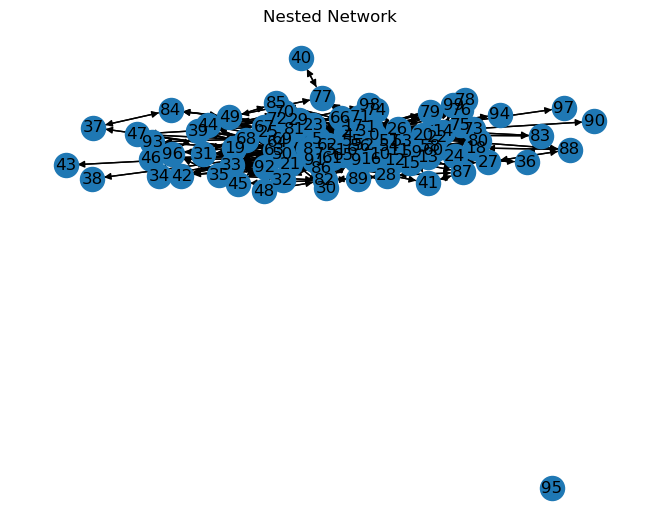

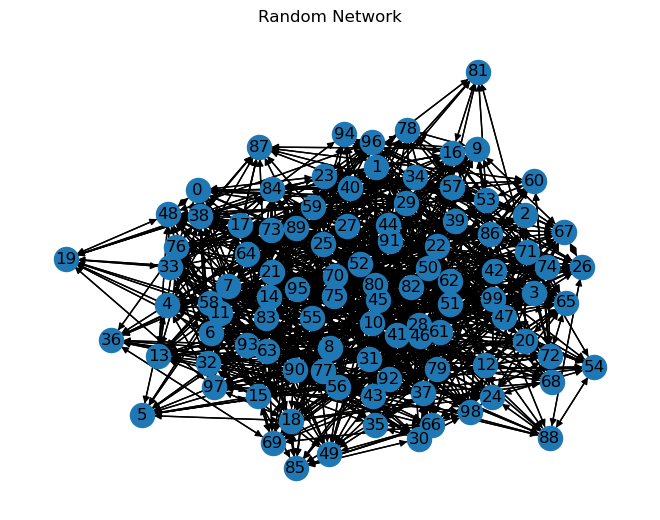

In [8]:
#Nested Network image representation in NetworkX 1st figure
fig1=plt.figure()

nx.draw(Nested,with_labels=True)
#Title
plt.title('Nested Network')
#Random Network image representation in NetworkX 2nd figure
fig2=plt.figure()

nx.draw(Random,with_labels=True)
#title
plt.title('Random Network')

## Degree distribution Computation

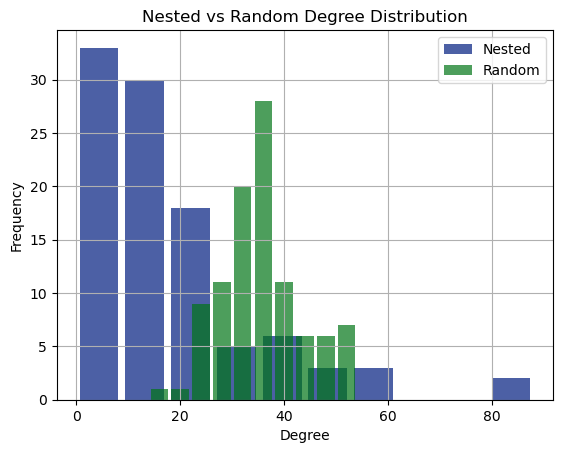

In [9]:
#Nested Network Degree distribution computation
NDD = [Nested.degree(n) for n in Nested.nodes()]
#NDD=list(Nested.degree())
#Random Network Degree distribution computation
#RDD=list(Random.degree())
RDD = [Random.degree(n) for n in Random.nodes()]

#Nested and Random Degree distribution plot histogram
fig3=plt.figure()
plt.hist(NDD,alpha=0.7,label='Nested', rwidth=0.85)
plt.hist(RDD,alpha=0.7,label='Random',  rwidth=0.85)

# Add plot labels and title
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Nested vs Random Degree Distribution')

# Adjust plot aesthetics
plt.grid(True)  # Add grid lines
plt.legend()  # Display legend

# Show plot
plt.show()


Chatty help code:

/tmp/ipykernel_146209/716977095.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


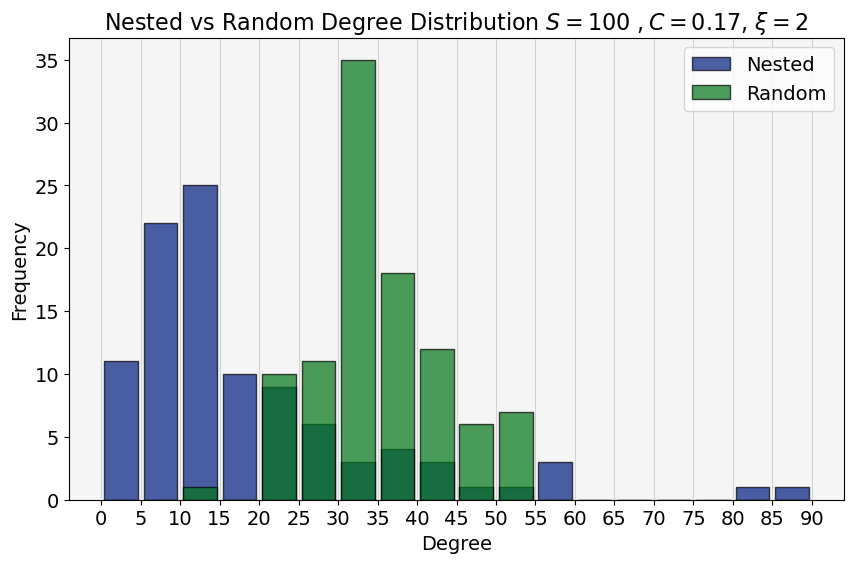

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [12]:
#Nested Network Degree distribution computation
NDD = [Nested.degree(n) for n in Nested.nodes()]
#NDD = list(Nested.degree())

#Random Network Degree distribution computation
#RDD = list(Random.degree())
RDD = [Random.degree(n) for n in Random.nodes()]

# Determine the minimum and maximum degrees
min_degree = min(min(NDD), min(RDD))
max_degree = max(max(NDD), max(RDD))

# Define the bin range with a step of 5
bin_range = range(min_degree, max_degree + 5, 5)

#Nested and Random Degree distribution plot histogram with dark borders and custom colors custom size
fig,ax = plt.subplots(figsize=(10, 6))
plt.style.use('seaborn-dark-palette')
ax.hist(NDD, bins=bin_range, alpha=0.7, label='Nested', rwidth=0.85, edgecolor='black')
ax.hist(RDD, bins=bin_range, alpha=0.7, label='Random', rwidth=0.85, edgecolor='black')

# Adjusting tick labels in the x-axis
plt.xticks(bin_range)
#bigger ticks
plt.tick_params(axis='both', which='major', labelsize=14)

# Add other plot customizations (e.g., labels, legend, etc.)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=14)
#Title with 'Nested vs Random Degree Distribution' and S C and \xi values latex style
plt.title(r'Nested vs Random Degree Distribution $S=$'+str(S)+r' $, C=$'+str(C)+r', $\xi=$'+str(xi), fontsize=16)
fig.patch.set_facecolor('white')
ax.set_facecolor('whitesmoke')
ax.set_facecolor('whitesmoke')
ax.grid(axis='x', alpha=0.5)
#savefig pn and pdf
#gaussian(for random) ang lognormal(for nested) fit to the data





# Display the plot
plt.show()

#Print color codes used in this plot
print(plt.style.available)


/tmp/ipykernel_146209/1971186558.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


933.213561623157
1100.4672604031578


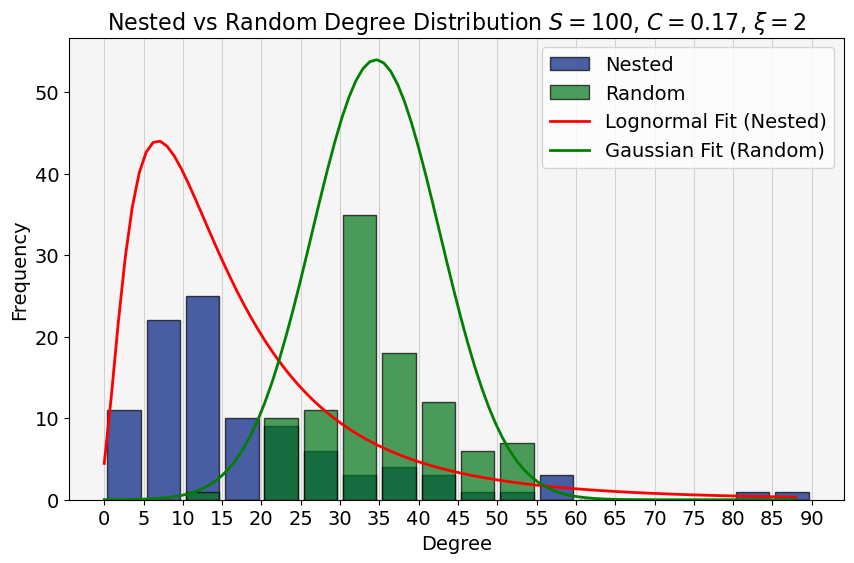

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm

# Nested Network Degree distribution computation
NDD = [Nested.degree(n) for n in Nested.nodes()]

# Random Network Degree distribution computation
RDD = [Random.degree(n) for n in Random.nodes()]

# Determine the minimum and maximum degrees
min_degree = min(min(NDD), min(RDD))
max_degree = max(max(NDD), max(RDD))

# Define the bin range with a step of 5
bin_range = range(min_degree, max_degree + 5, 5)

# Nested and Random Degree distribution plot histogram with dark borders and custom colors custom size
fig, ax = plt.subplots(figsize=(10, 6))
plt.style.use('seaborn-dark-palette')
ax.hist(NDD, bins=bin_range, alpha=0.7, label='Nested', rwidth=0.85, edgecolor='black')
ax.hist(RDD, bins=bin_range, alpha=0.7, label='Random', rwidth=0.85, edgecolor='black')

# Fit lognormal distribution to Nested data
shape, loc, scale = lognorm.fit(NDD)
x = np.linspace(min_degree, max_degree, 100)
y_lognorm = lognorm.pdf(x, shape, loc=loc, scale=scale)
#multiplicador maxy lognorm/max nested degree
mult=1/(2*(max(y_lognorm)/max(NDD)))
print(mult)

ax.plot(x, y_lognorm*mult, 'r-', linewidth=2, label='Lognormal Fit (Nested)')

# Fit Gaussian distribution to Random data
mu, sigma = norm.fit(RDD)
y_gaussian = norm.pdf(x, mu, sigma)
#multiplicador maxy gauss/max random degree
mult2=1/(max(y_gaussian)/max(RDD))
print(mult2)
ax.plot(x, y_gaussian*mult2, 'g-', linewidth=2, label='Gaussian Fit (Random)')

# Adjusting tick labels in the x-axis
plt.xticks(bin_range)
plt.tick_params(axis='both', which='major', labelsize=14)

# Add other plot customizations (e.g., labels, legend, etc.)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=14)

# Title with 'Nested vs Random Degree Distribution' and S, C, and \xi values latex style
plt.title(r'Nested vs Random Degree Distribution $S={}$, $C={}$, $\xi={}$'.format(S, C, xi), fontsize=16)
fig.patch.set_facecolor('white')
ax.set_facecolor('whitesmoke')
ax.grid(axis='x', alpha=0.5)



# Display the plot
plt.show()

# Print color codes used in this plot
print(plt.style.available)


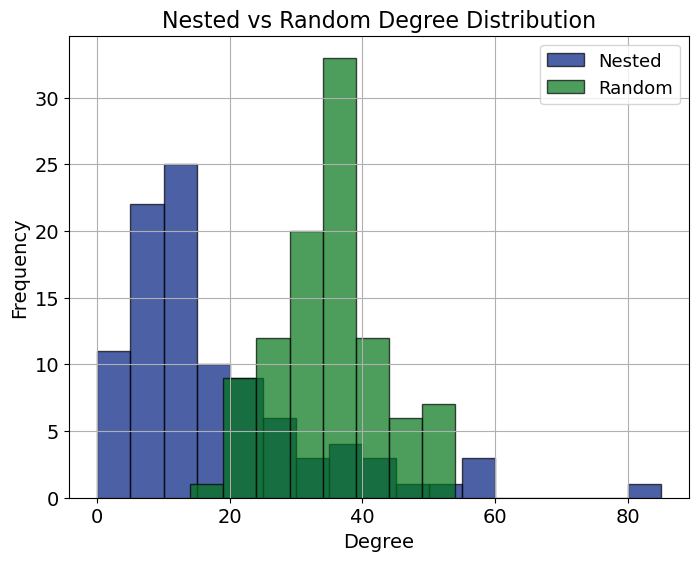

In [11]:
# Nested Network Degree distribution computation
NDD = [Nested.degree(n) for n in Nested.nodes()]

# Random Network Degree distribution computation
RDD = [Random.degree(n) for n in Random.nodes()]

# Nested and Random Degree distribution plot histogram
fig3 = plt.figure(figsize=(8, 6))  # Adjust the figure size as desired

# Plotting the histograms
plt.hist(NDD, bins=range(min(NDD), max(NDD) + 1, 5), alpha=0.7, label='Nested', edgecolor='black')
plt.hist(RDD, bins=range(min(RDD), max(RDD) + 1, 5), alpha=0.7, label='Random', edgecolor='black')

# Add plot labels and title
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Nested vs Random Degree Distribution', fontsize=16)

#bigger ticks and labels and legend and axes
plt.tick_params(axis='both', which='major', labelsize=14)



# Adjust plot aesthetics
plt.grid(True)  # Add grid lines
plt.legend(fontsize=13)  # Display legend

# Show plot
plt.show()


# Connectance VS Xi

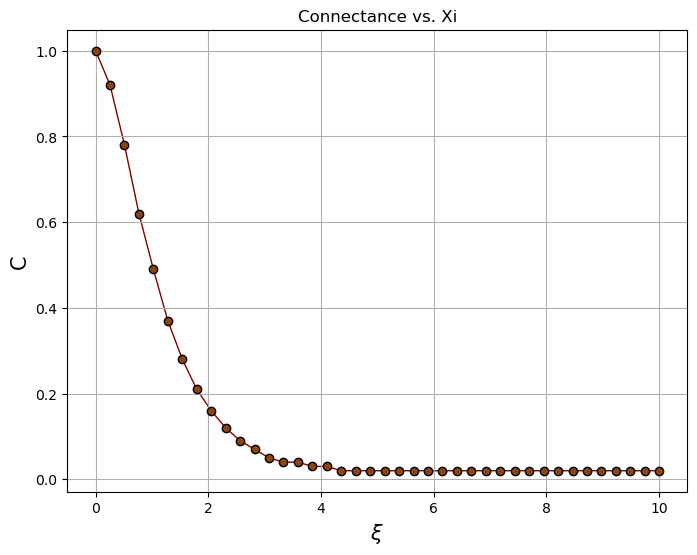

In [8]:
import matplotlib.pyplot as plt
import numpy as np

N = 50
xiStep = 40
xiMin = 0.001
xiMax = 10
xiList = np.linspace(xiMin, xiMax, xiStep)

connList = []

for xi in xiList:
    C = xiConnRelationship(N, xi)
    connList.append(C)

plt.figure(figsize=(8, 6))  # Adjust the figure size as desired

# Define epic/formal thesis color palette
color_palette = ['#800000', '#8B4513', '#006400', '#000080', '#4B0082']

plt.plot(xiList, connList, color=color_palette[0], linewidth=1, zorder=1)
plt.scatter(xiList, connList, c=color_palette[1], edgecolors='k', zorder=2)

plt.xlabel(r"$\xi$", fontsize=15)
plt.ylabel("C", fontsize=15)
plt.title("Connectance vs. Xi")

plt.grid(True)  # Add grid lines

plt.show()


In [47]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

# Range of 'a' values
a_values = np.linspace(0.1, 7, 100)

# Calculate the connectance values
connectance =  (a_values * gamma(a_values)**2) / (2 * gamma(2*a_values))


N = 50
xiStep = 40
xiMin = 0.001
xiMax = 7
xiList = np.linspace(xiMin, xiMax, xiStep)

connList = []

for xi in xiList:
    C = xiConnRelationship(N, xi)
    connList.append(C)

fig,ax=plt.figure(figsize=(8, 6))  # Adjust the figure size as desired

# Define epic/formal thesis color palette
color_palette = ['#800000', '#8B4513', '#006400', '#000080', '#4B0082']

ax.plot(xiList, connList, color=color_palette[0], linewidth=1, zorder=1, label='Connectance')
#plt.scatter(xiList, connList, c=color_palette[1], edgecolors='k', zorder=2)

"""
# Add another plot
y = 1 - 0.5 * xiList
y = np.where(y < 0, 0, y)  # Apply the constraint to set y to 0 if it is less than 0
plt.plot(xiList, y, color=color_palette[2], linewidth=1, linestyle='--', zorder=3, label='y = 1 - (1/2)ξ')
"""

#Crosses scatter plot
ax.scatter(a_values, connectance, c=color_palette[0], edgecolors='k', zorder=2, label='Thoretical Relationship')

plt.xlabel(r"$\xi$", fontsize=15)
plt.ylabel("C", fontsize=15)
plt.title("Connectance vs. Xi")
plt.legend()

plt.grid(True)  # Add grid lines

plt.show()


TypeError: cannot unpack non-iterable Figure object

<Figure size 800x600 with 0 Axes>

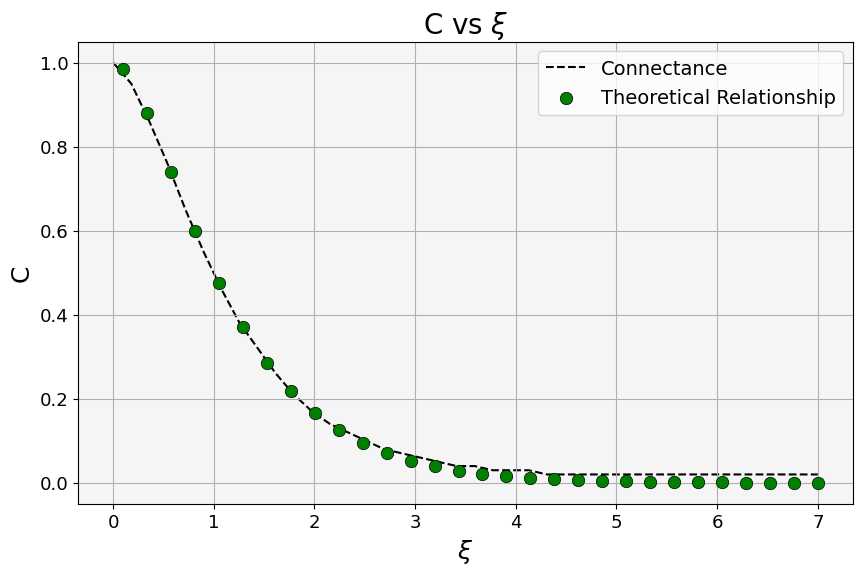

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

# Range of 'a' values
a_values = np.linspace(0.1, 7, 100)
a_values2=np.linspace(0.1, 7, 30)

# Calculate the connectance values
connectance =  (a_values2 * gamma(a_values2)**2) / (2 * gamma(2*a_values2))

N = 50
xiStep = 40
xiMin = 0.001
xiMax = 7
xiList = np.linspace(xiMin, xiMax, xiStep)

connList = []

for xi in xiList:
    C = xiConnRelationship(N, xi)
    connList.append(C)

fig,ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as desired

# Define epic/formal thesis color palette
#plt.style.use('seaborn-dark-palette')

ax.plot(xiList, connList, zorder=1, label='Connectance',color="Black", linestyle='--', linewidth=1.5)



ax.scatter(a_values2, connectance, edgecolors='k',color='Green', zorder=2, label='Theoretical Relationship', s=80, linewidths=0.5)

plt.xlabel(r"$\xi$", fontsize=18)
plt.ylabel("C", fontsize=18)
plt.title(r"C vs $\xi$", fontsize=20)
plt.legend(fontsize=14)

plt.grid(True)  # Add grid lines

# Increase tick font size for x and y axes
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Make points and lines more visible
plt.rcParams['lines.markersize'] = 8
plt.rcParams['lines.linewidth'] = 1.5

fig.patch.set_facecolor('white')
ax.set_facecolor('whitesmoke')
ax.set_facecolor('whitesmoke')


plt.show()


#Same figure without the scater

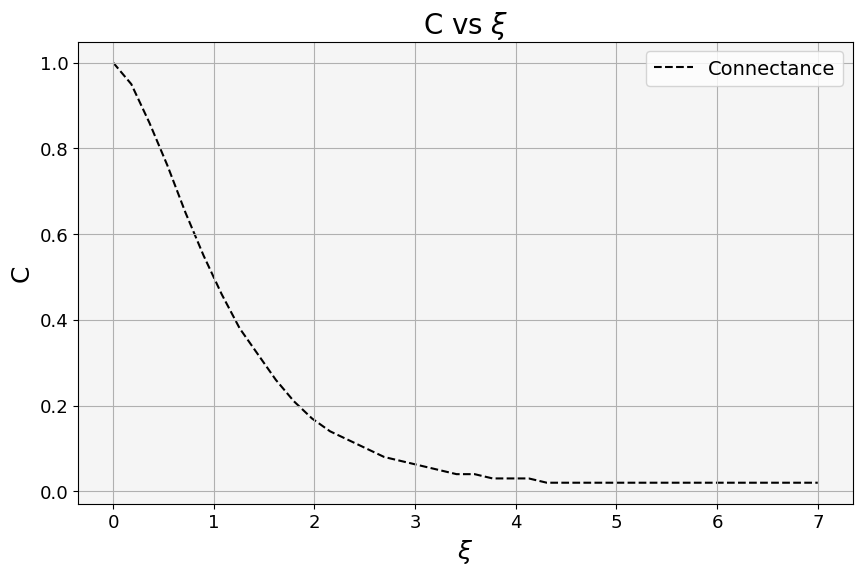

In [4]:
#same fig withotu the theoretical line
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

# Range of 'a' values
a_values = np.linspace(0.1, 7, 100)


N = 50
xiStep = 40
xiMin = 0.001
xiMax = 7
xiList = np.linspace(xiMin, xiMax, xiStep)

connList = []

for xi in xiList:
    C = xiConnRelationship(N, xi)
    connList.append(C)

fig,ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as desired

# Define epic/formal thesis color palette
#plt.style.use('seaborn-dark-palette')

ax.plot(xiList, connList, zorder=1, label='Connectance',color="Black", linestyle='--', linewidth=1.5)



plt.xlabel(r"$\xi$", fontsize=18)
plt.ylabel("C", fontsize=18)
plt.title(r"C vs $\xi$", fontsize=20)
plt.legend(fontsize=14)

plt.grid(True)  # Add grid lines

# Increase tick font size for x and y axes
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Make points and lines more visible
plt.rcParams['lines.markersize'] = 8
plt.rcParams['lines.linewidth'] = 1.5

fig.patch.set_facecolor('white')
ax.set_facecolor('whitesmoke')
ax.set_facecolor('whitesmoke')




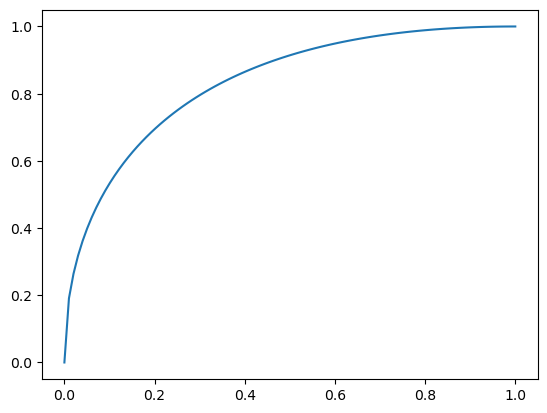

In [46]:
#plot y = 1-(1-x**(1/xi))**xi
import matplotlib.pyplot as plt
import numpy as np

xi=2
x = np.linspace(0, 1, 100)
y = 1-(1-x**(1/xi))**xi

plt.plot(x, y)

How to build a Nested Matrix:

10


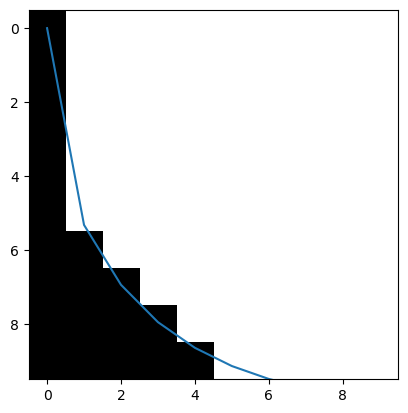

In [45]:
N=10 
xi=2
xList = np.arange(0,N)/N #x values
print(len(xList))
#initialize 
yList = [] #y list 
curveDict = dict({}) #x-y dict

#column loop
for x in xList:
    
    #nested profile
    y = 1-(1-x**(1/xi))**xi
    yList.append(y)
    curveDict[round(x,2)]=y
#Plot Function

plt.plot(np.array(xList)*10,np.array(yList)*10,zorder=2)



#BUILD PERFECT NESTED MATRIX
M = np.zeros((N,N),dtype=int)
for i in range(N):
    for j in range(N):
        
        iNorm = round(i/N,2)
        jNorm = j/N
        
        curvePoint = curveDict[iNorm]
        
        if curvePoint <= jNorm:
            M[j,i]=1
#Plot matrix
plt.imshow(M,cmap='Greys',interpolation='none',zorder=1)
                

La explicación de por qué la función cuando la ploteamos sola es distinta a cuando la ploteamos con una matrix es debido a que los idices de la matriz son distintos;
    El origen 0 0 de una matriz está arriba a la izquierda
    El origen 0 0 en un plano cartesiano esta abajo a la izquierda (como estamos acostumbrados). 
    
Si nosotros obligamos a que jnorm (nuestras y) cuando sean mayor que la función el elemento Aij sea 1 conseguimos la figura de nestedness